In [ ]:
"""
This file compares LID and edge ratio values of imagenet images.
Both LID and edge ratio are complexity measures.
"""

In [1]:

import json

In [2]:
# import LID and edge values and see how well they correlate
with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/imageNet_LID_values/training_set/all_lids.json", "r") as f:
    lid_data = json.load(f)

with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/imageNet_edge_ratios/train_imageNet_edge_ratios.json", "r") as f:
    edge_data = json.load(f)


In [3]:
print(len(lid_data))
print(len(edge_data))

992000
1281167


In [6]:
# find the mean and std of both
import numpy as np
print("LID mean:", np.mean(lid_data))
print("LID std:", np.std(lid_data))
print("Edge ratio mean:", np.mean(edge_data))
print("Edge ratio std:", np.std(edge_data))

LID mean: -5541565.539243573
LID std: 708356.6451041537
Edge ratio mean: 0.12365674732509044
Edge ratio std: 0.03920917430733081


In [7]:
# perform normalization on both
lid_data_norm = (lid_data - np.mean(lid_data)) / np.std(lid_data)
edge_data_norm = (edge_data - np.mean(edge_data)) / np.std(edge_data)

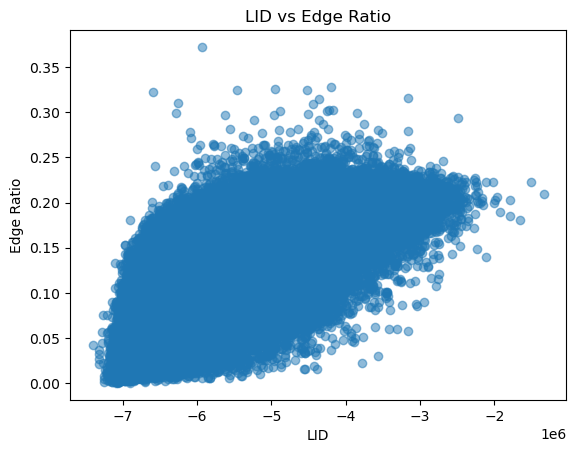

In [5]:
# plot them together
import matplotlib.pyplot as plt

plt.scatter(lid_data, edge_data[:len(lid_data)], alpha=0.5)
plt.xlabel("LID")
plt.ylabel("Edge Ratio")
plt.title("LID vs Edge Ratio")
plt.show()

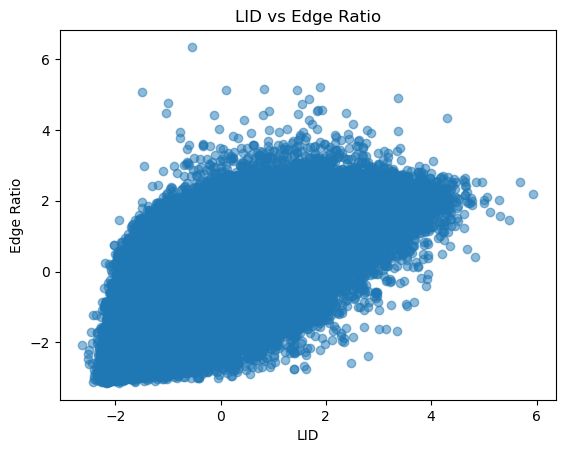

In [8]:
plt.scatter(lid_data_norm, edge_data_norm[:len(lid_data)], alpha=0.5)
plt.xlabel("LID")
plt.ylabel("Edge Ratio")
plt.title("LID vs Edge Ratio")
plt.show()

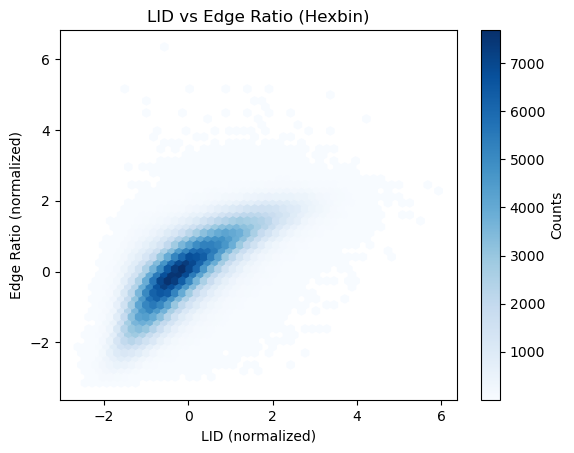

In [9]:
# use hexbin for ploting 
plt.hexbin(lid_data_norm, edge_data_norm[:len(lid_data)], gridsize=50, cmap='Blues', mincnt=1)
plt.xlabel("LID (normalized)")
plt.ylabel("Edge Ratio (normalized)")
plt.title("LID vs Edge Ratio (Hexbin)")
plt.colorbar(label='Counts')
plt.show()

In [11]:
# find the correlation coefficient
correlation = np.corrcoef(lid_data, edge_data[:len(lid_data)])
print("Correlation coefficient between LID and Edge Ratio:", correlation[0, 1])

Correlation coefficient between LID and Edge Ratio: 0.7633146833396288
